####  * 확률 분포

+ 이산 확률 분포 : 베르누이분포, 이항분포, 다항분포
+ 연속 확률 분포 : 정규분포, 균등분포


#### stats 서브 패키지의 함수들
+ 이산 확률 분포 : 베르누이분포(bernoulli), 이항분포(binom), 다항분포(multinomial)
+ 연속 확률 분포 : 균일분포(uniform), 가우시안 정규 분포(norm), 베타분포(beta), 감마분포(gamma), 스튜던트 t분포(t), 카이제곱분포(chi2), f분포(f), 디리클리 분포(dirichlet)

In [1]:
import scipy as sp
from scipy import stats

rv = stats.norm()  # 정규분포 객체 생성
print(type(rv)) 
rv


<class 'scipy.stats._distn_infrastructure.rv_frozen'>


#### 모수(parameter) 지정

- 확률 분포 객체를 생성할 때는 분포의 형태를 구체적으로 지정하는 모수를 인수로 지정해야 한다
- loc(분포이 기댓값), scale(표준편차) 두 개의 모수는 기본적으로 사용한다



+ size : 샘플 생성시 생성될 샘플의 크기
+ random_state : 샘플 생성시 사용되는 seed 값

In [2]:
# 기댓값이 1이고 표준편차가 2인 정규분포 객체 생성
rv = stats.norm(loc=1, scale=2)  
print(type(rv)) 


<class 'scipy.stats._distn_infrastructure.rv_frozen'>


#### 확률분포 메소드

- pdf() : 확률밀도 함수 (probability density function)
- pmf() : 확률질량 함수 (probability mass function)
- cdf() : 누적분포 함수 (cumulative distribution function )
- rvs() : 램덤 샘플 생성 (random variable sampling)

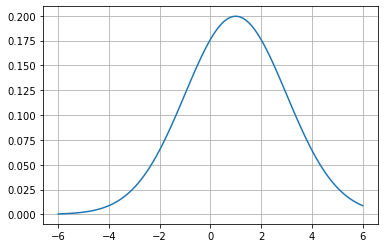

In [3]:
# 확률밀도 함수
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-6,6, 100) # -6에서 6중에 100개 샘플
pdf = rv.pdf(x)  # 기댓값이 1이고 표준편차가 2인 정규분포객체(rv)를 통해 확률밀도함수를 사용

plt.plot(x, pdf)
plt.grid(True)

# [결과분석] x축좌표 -6에서 6사이이고, y축은 표준편차 2까지인 확률밀도함수

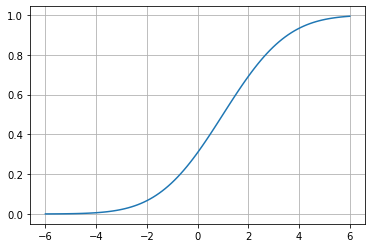

In [4]:
# 누적분포함수
x = np.linspace(-6,6,100)
cdf = rv.cdf(x)
plt.plot(x, cdf)
plt.grid(True)

[[ 4.52810469  1.80031442  2.95747597  5.4817864 ]
 [ 4.73511598 -0.95455576  2.90017684  0.69728558]]


C:\Users\simmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-6.0, 6.0)

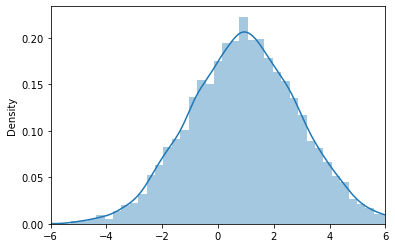

In [5]:
# 랜덤샘플생성 :rvs()를 size 와 random_state 인수과 사용한다
rvs = rv.rvs(size=(2,4), random_state=0)
print(rvs) # 2행 4열 크기의  seed 0값으로 램덤샘플 생성

# 실수 분포 플롯 (seaborn 패키지 : distplot, kdeplot, rugplot)
import seaborn as sns
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.xlim(-6,6)

<AxesSubplot:>

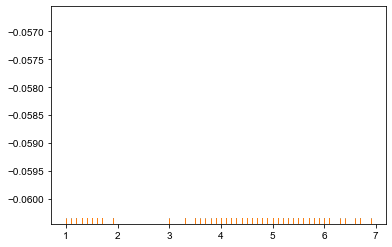

In [6]:
# rugplot : rug(작은선분)을 이용아혀 x축 위에 실제 데이터들의 위치를 보여주는 플롯
iris = sns.load_dataset('iris')
data = iris.petal_length.values
sns.rugplot(data)

# seaborn 세팅
sns.set()
sns.set_style('whitegrid')
sns.rugplot(data)

C:\Users\simmi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

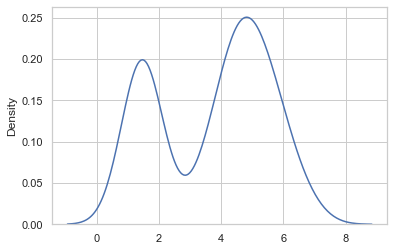

In [7]:
# kdeplot (kernel density plot) : 커널 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포곡선을 표현하는 플롯
# sns.kdeplot(data)

# distplot : 히스토그램에 rugplot과 커널 밀도 표시 기능이 있음
# sns.distplot(data)

# sns.distplot(data, rug=True)

# sns.distplot(data, kde=False) # 커널 밀도 표시를 안하면 기존의 히스토그램과 유사

# sns.distplot(data, kde=False, bins=20)  # bins : 

sns.distplot(data, hist=False) # 히스토그램을 없애면 커널밀도함수 표시